In [1]:
# Install RDKit
%%capture
!pip install rdkit

In [2]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

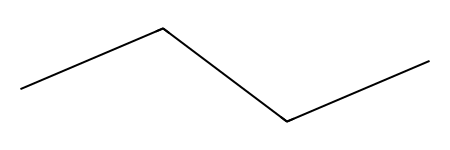

In [3]:
mol = Chem.MolFromSmiles('CCCC')
mol


In [4]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [5]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

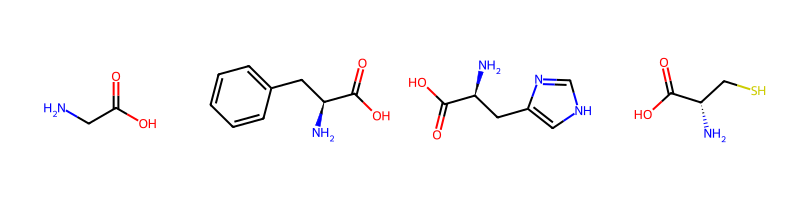

In [6]:
smiles_list = ['C(C(=O)O)N', 'c1ccc(cc1)C[C@@H](C(=O)O)N', 'O=C([C@H](CC1=CNC=N1)N)O', 'C([C@@H](C(=O)O)N)S']
# butane, phenylaline, histidine, 
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

In [7]:
#pattern = Chem.MolFromSmiles('S')
#pattern = Chem.MolFromSmiles('C(=O)O')
#pattern = Chem.MolFromSmiles('CC(N)C')
pattern = Chem.MolFromSmarts('[r5]')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
True
False


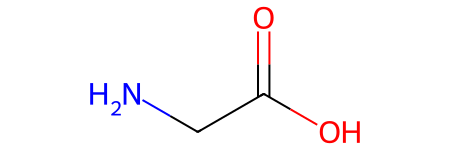

In [8]:
glycine = mol_list[0]
glycine

In [10]:
bi = {}

fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024,bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

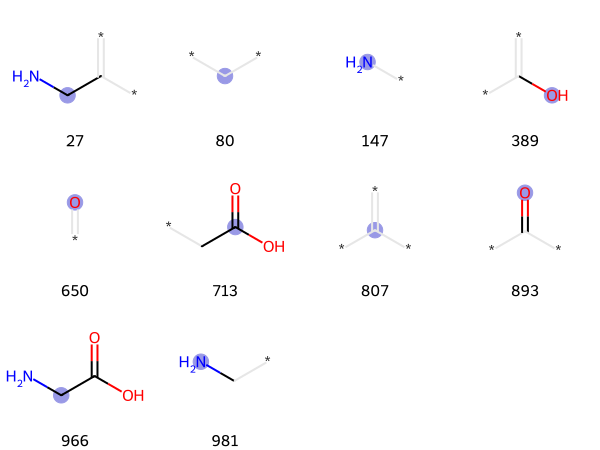

In [13]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

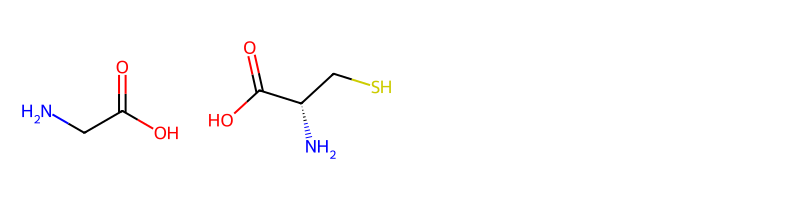

In [14]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow=4)
img

In [24]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024,bitInfo=bi)
print('cys',list(fp2.GetOnBits()))
print('gly',list(fp.GetOnBits()))

common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combine = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(common)
print(combine)
print('similarity score = ',len(common)/len(combine))

print('similarity score = ',DataStructs.TanimotoSimilarity(fp,fp2))

cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
{389, 807, 650, 80, 147, 893}
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
similarity score =  0.3
similraity score =  0.3
